<a href="https://colab.research.google.com/github/mohamedghaly1/NN-GA-BP/blob/main/TrainNN_using_GA_BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Breast Cancer Wisconsin (Diagnostic) Dataset in UCIML from Kaggle "First Time only"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle_dataset/

/content/gdrive/MyDrive/kaggle_dataset


In [ ]:
!ls

heartbeat  iris


In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 4.79MB/s]


In [ ]:
!mkdir breast-cancer
!mv breast-cancer-wisconsin-data.zip breast-cancer

In [ ]:
%cd breast-cancer/

/content/gdrive/MyDrive/kaggle_dataset/breast-cancer


In [ ]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Task 1

Mounted at /content/gdrive
/content/gdrive/MyDrive/kaggle_dataset/breast-cancer
There are 569 rows and 33 columns
-----------------------------------------------------------------------
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.

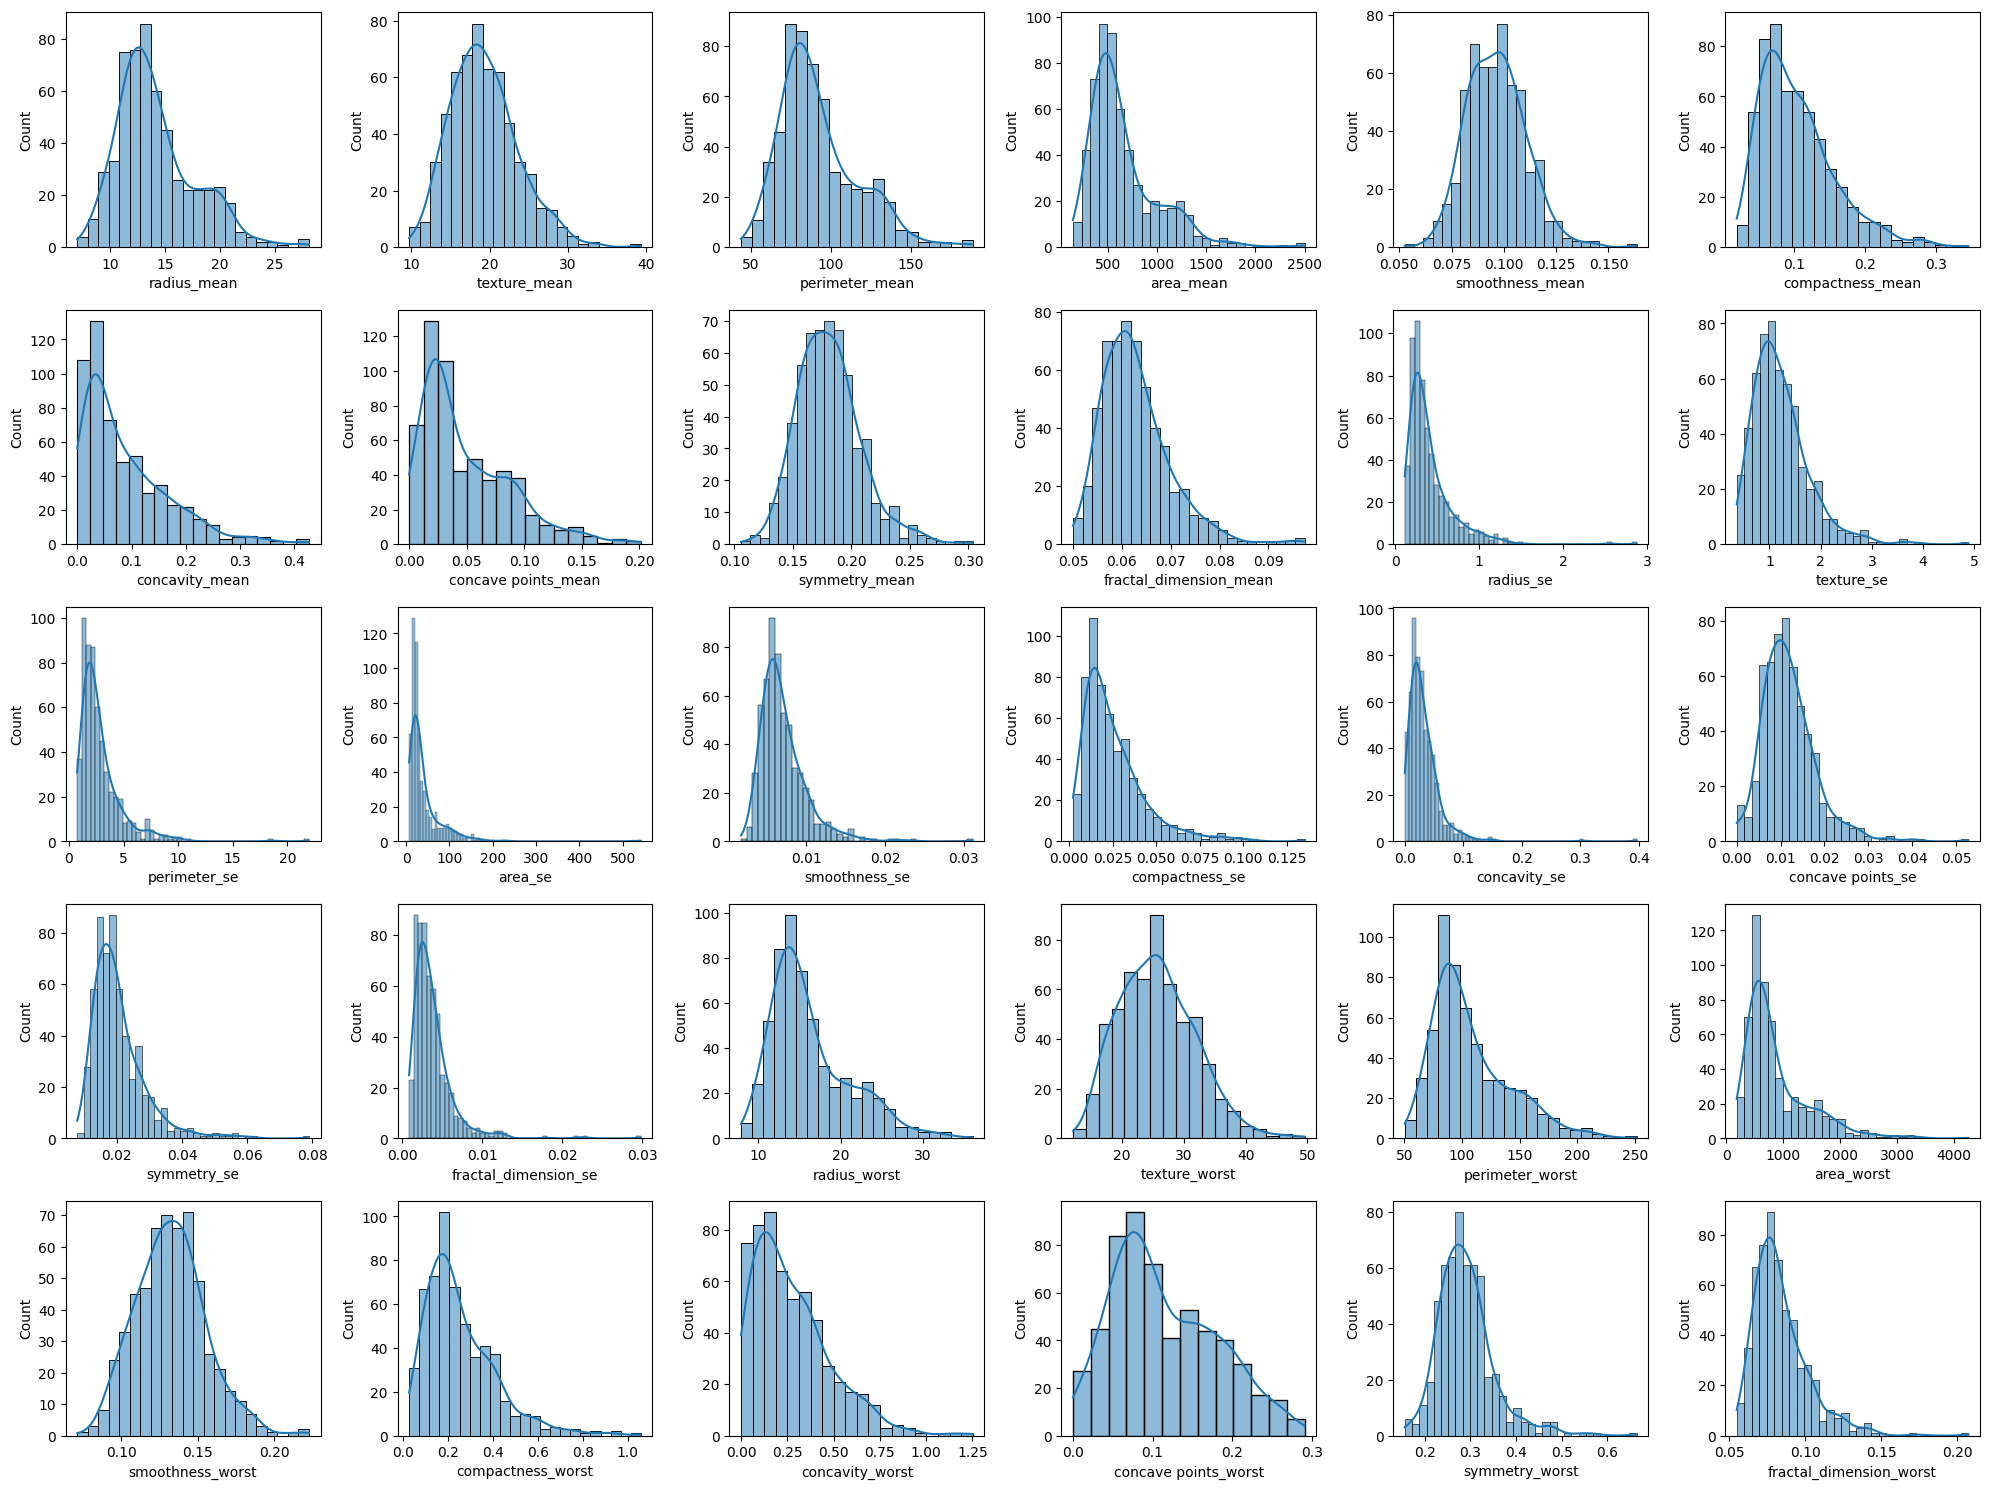

Number of Benign (B):  357
Number of Malignant (M):  212


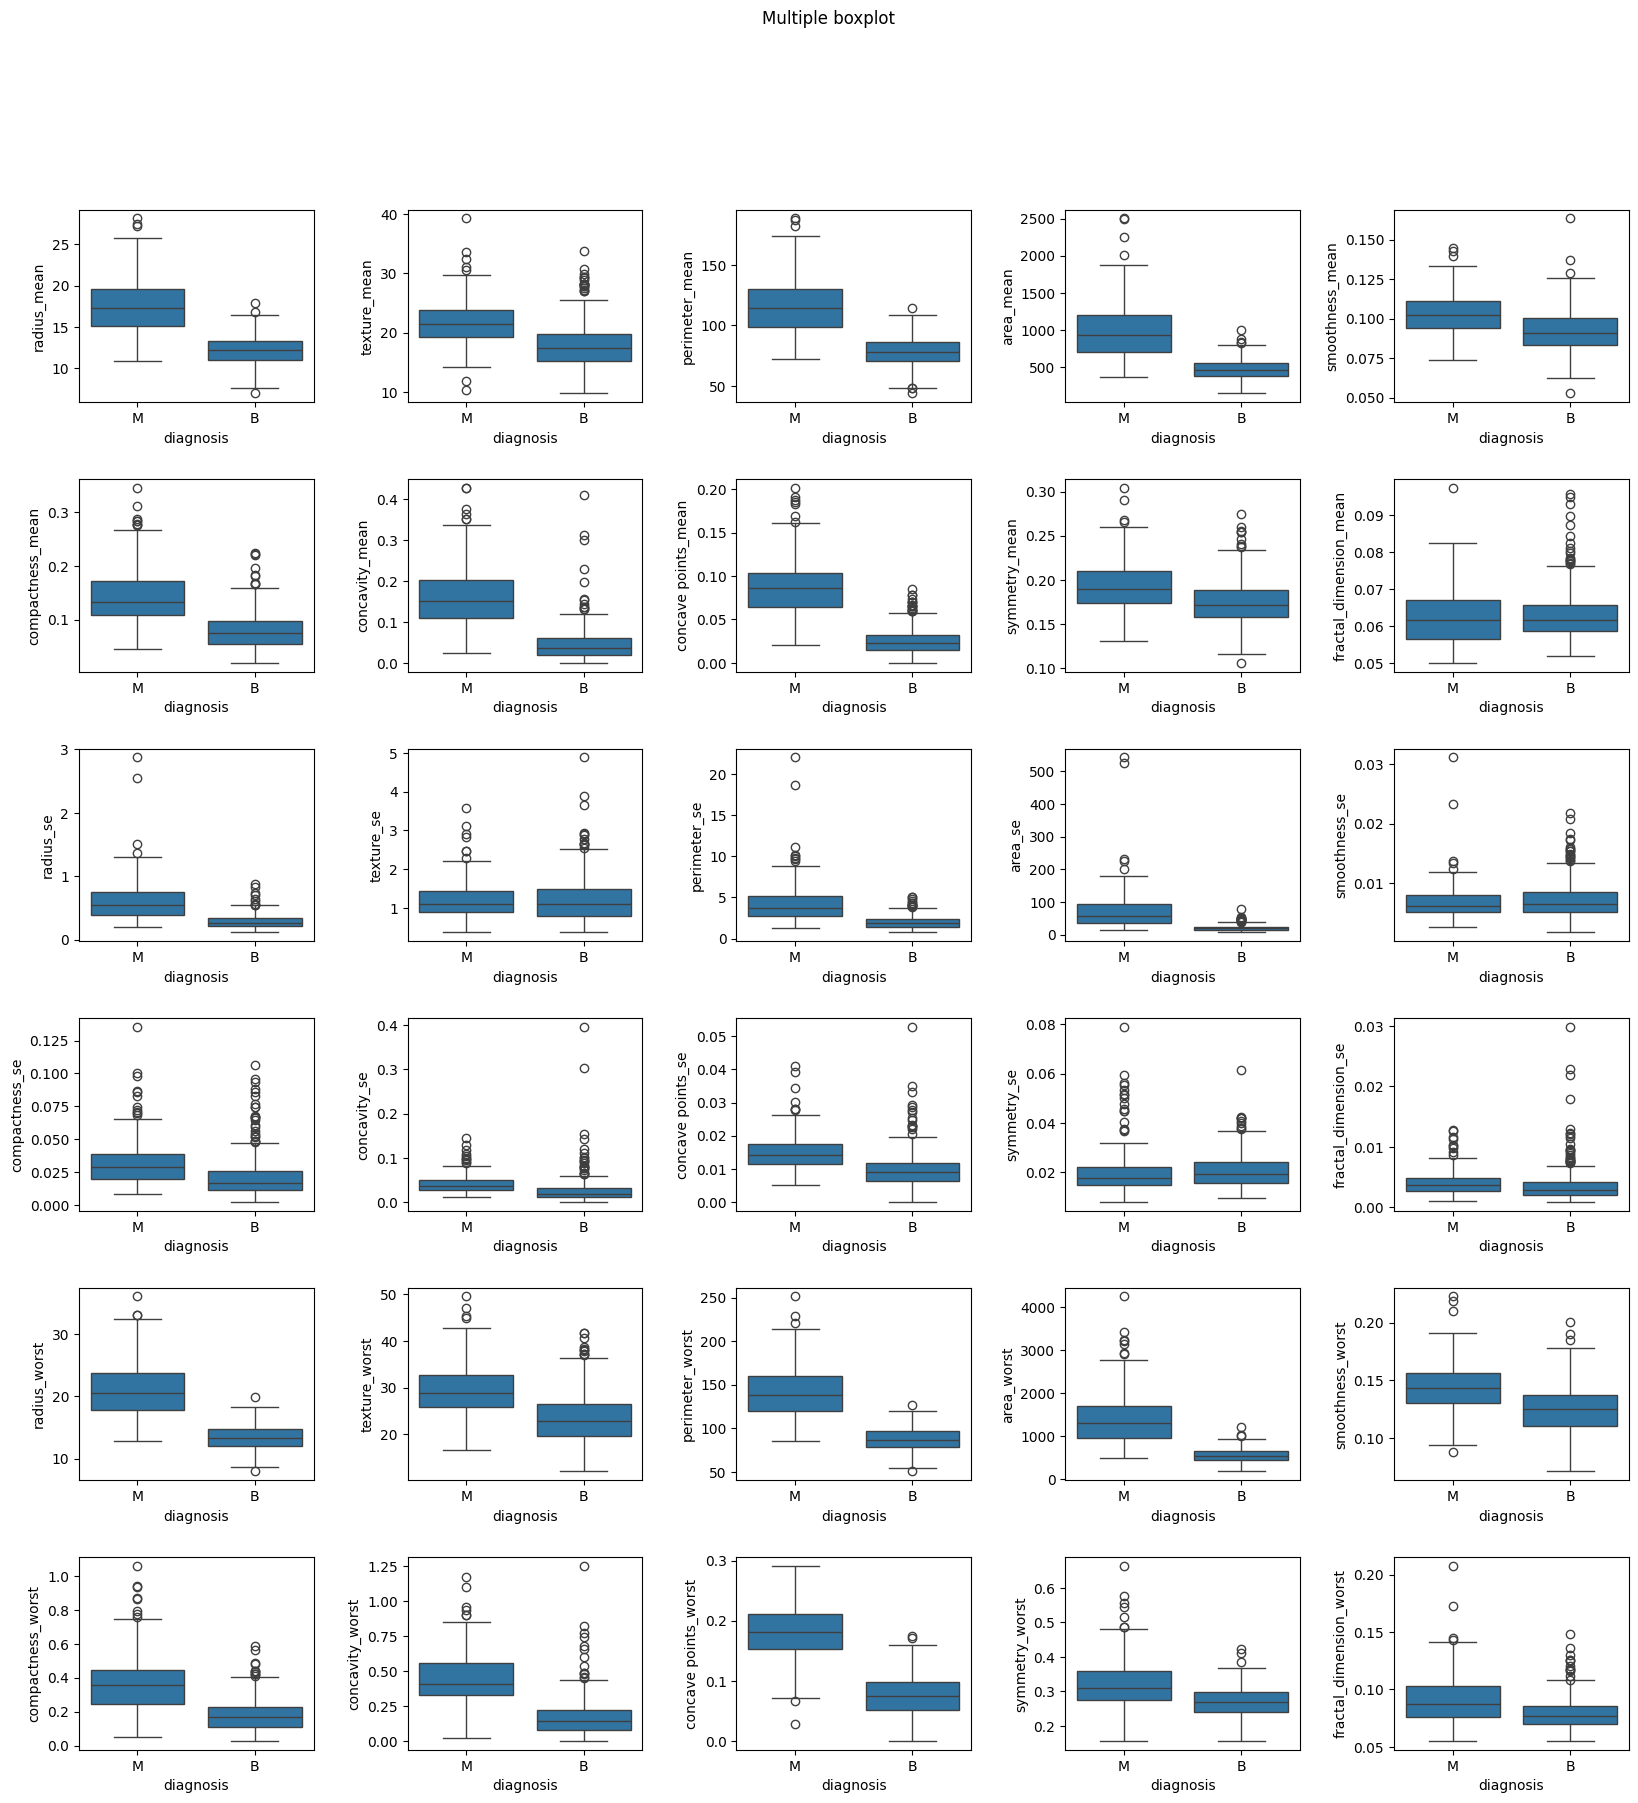

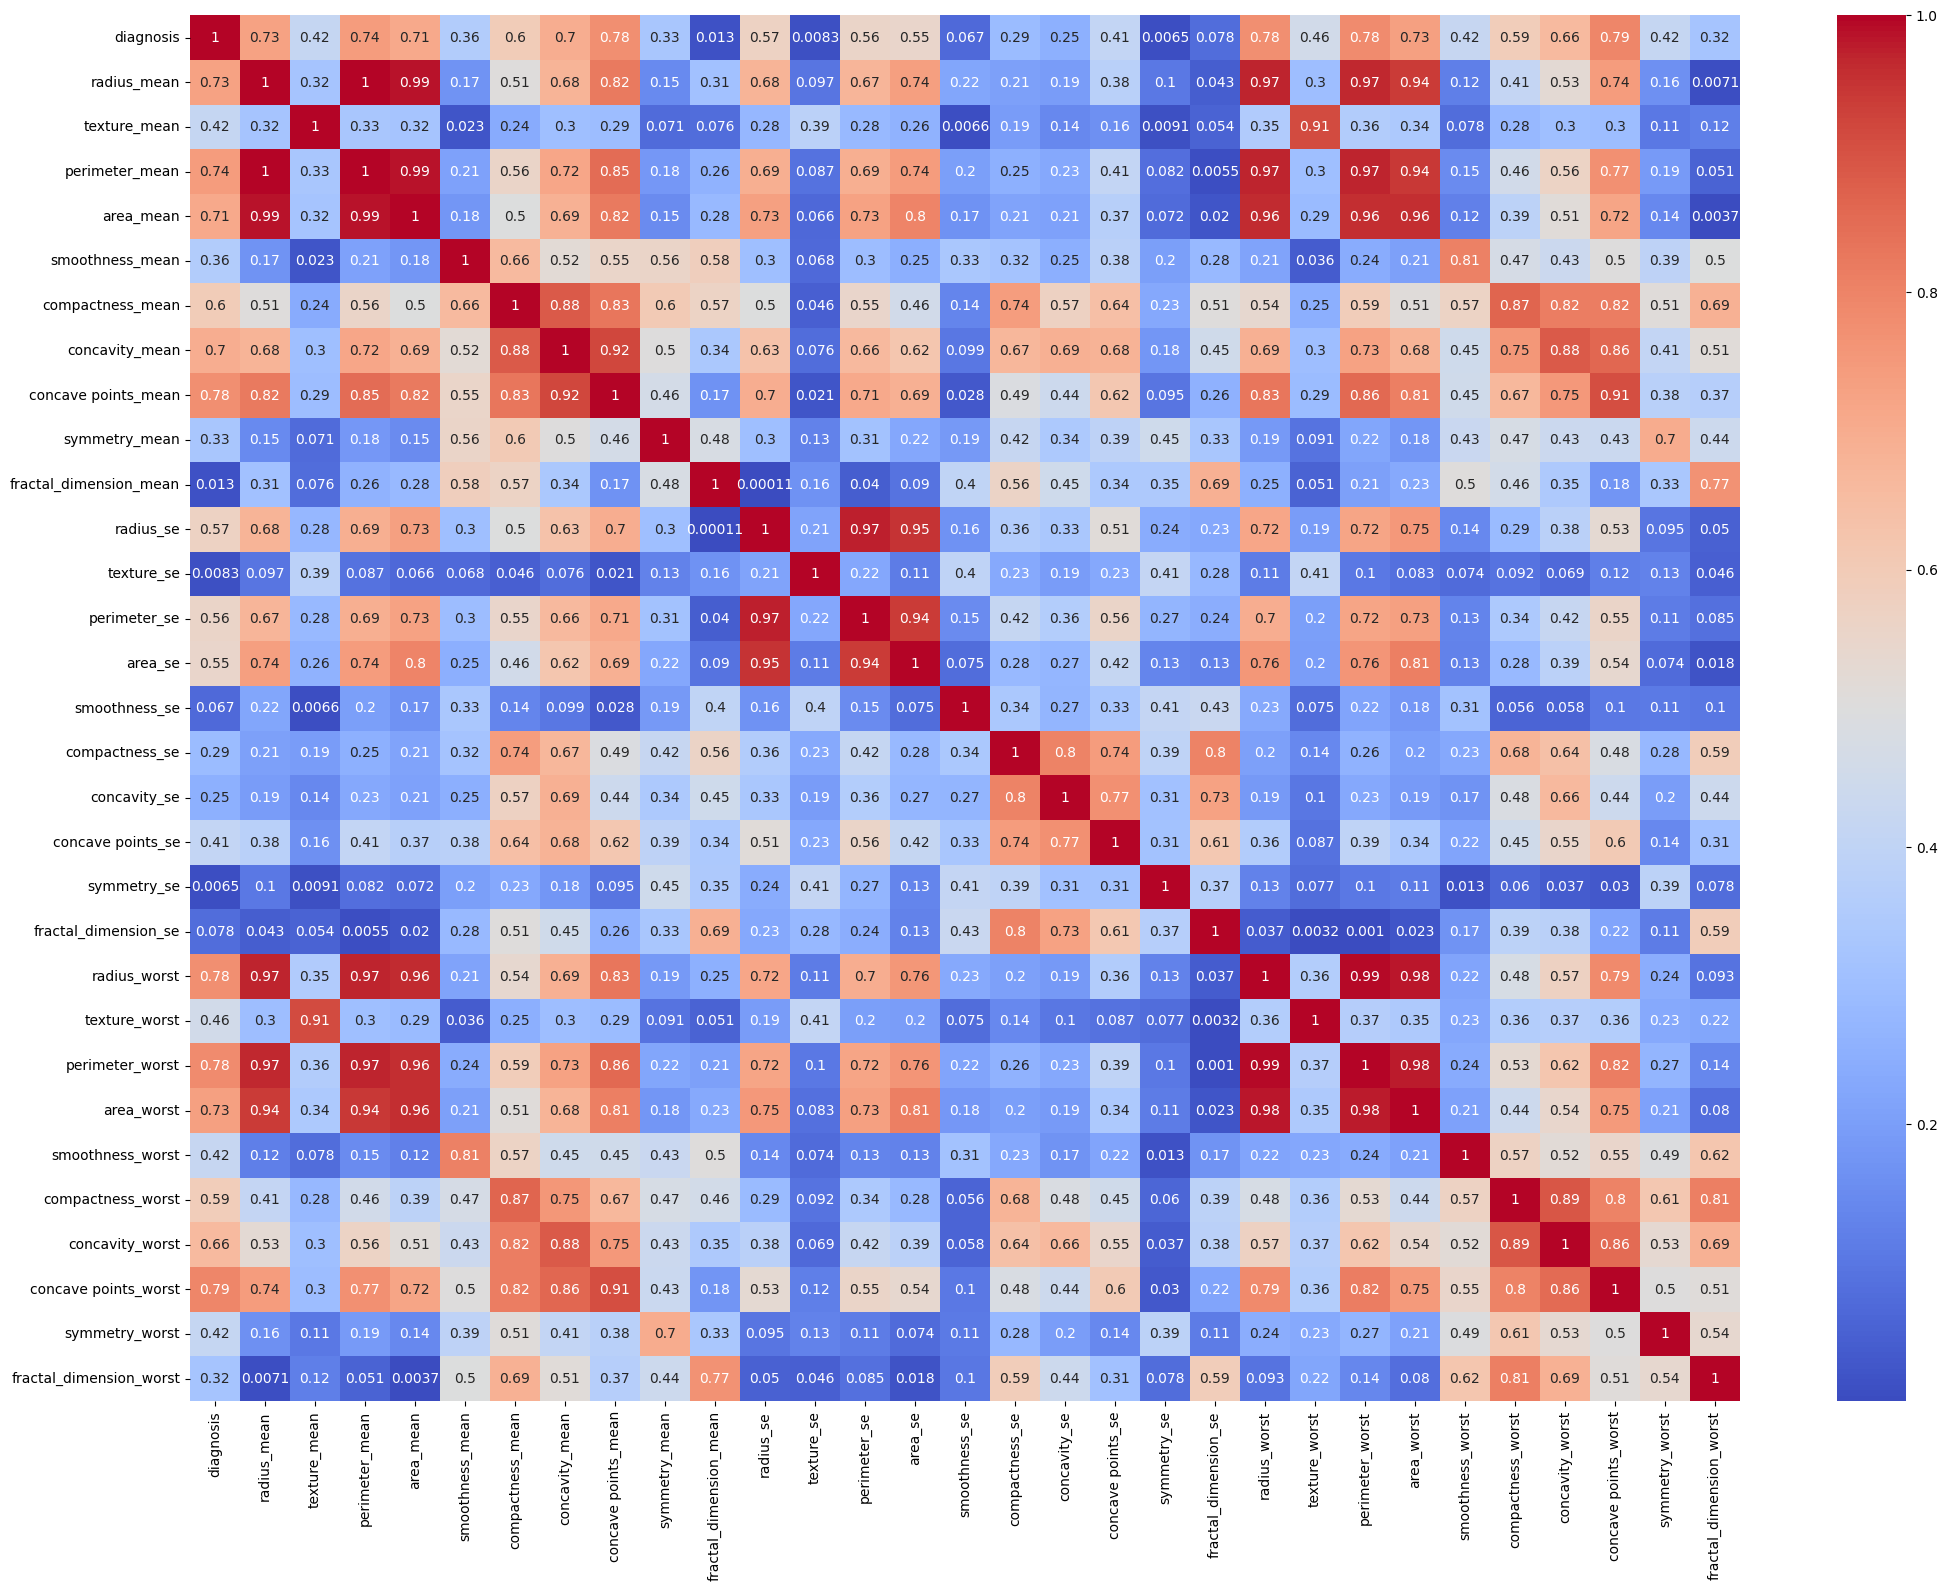

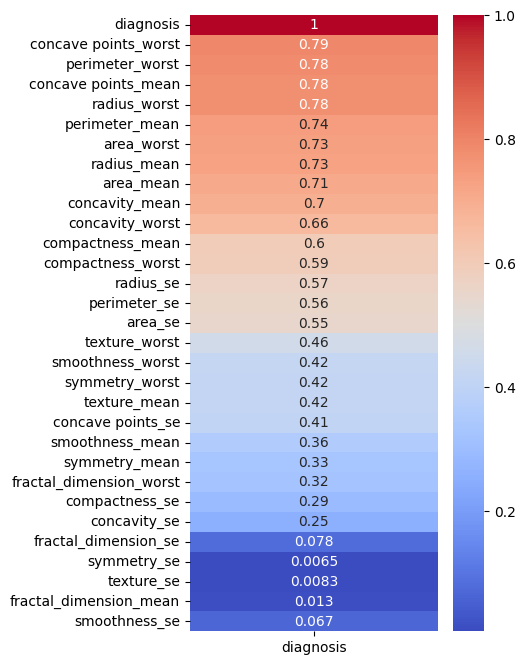

Successfully removed 5 columns fractal_dimension_se , symmetry_se , fractal_dimension_mean , texture_se , smoothness_se
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430 

'\nSummary of Data Visualization:\n- All are continuous numerical values except for Target column, so we changed it to 0(B) and 1(M)\n- Mean is slightly more than the median for most of the features. So it is right skewed.\n- Slight imbalance in the dataset Benign(0) cases are more than Malignant(1) cases\n- Mean of most features are clearly larger for Malignant cases compared to the benign cases (Groupby)\n- According to the Correlation and heatmap with diagnosis we dropped some features that is not important for the model\n- The scatter plot illustrates the relationship between different features, helping identify patterns or outliers based on diagnosis.\n- To better understand the distribution of the data for each of the benign and malignant class, it becomes essential to plot boxplots for all the columns separated by benign and malignant classes.\nWe can see that almost all the attributes have outliers present in them when we break them into malignant and benign classes.\n'

In [ ]:
#Task 1
#Task requirement: Select a UCI dataset (Breast Cancer), explain its significance, justify using a Neural Network, and preprocess data.
#Task overview: This task involves selecting and understanding a real-world dataset (Breast Cancer), describing its importance, and setting up data preprocessing steps to prepare for analysis with a Neural Network.

"""
Real-World Significance: The Breast Cancer Wisconsin (Diagnostic) dataset is used to help identify whether breast cancer cases are
malignant or benign based on cell features. This task is crucial because early and accurate detection of breast cancer can significantly
impact treatment options and patient outcomes, potentially saving lives. Breast cancer is one of the most common cancers globally, and improving
diagnostic accuracy could reduce unnecessary treatments and focus medical resources on the most critical cases.


Why Use a Neural Network: A Neural Network is a suitable choice for this problem because of the dataset's complex relationships and non-linear
patterns among the features. Breast cancer classification involves analyzing multiple cell attributes, which may interact in non-linear ways.
Neural networks excel in handling such interactions and can effectively model the underlying patterns, leading to potentially higher accuracy
compared to linear models or simpler algorithms.

"""

## Getting the dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/kaggle_dataset/breast-cancer/

### Data Preprocessing:-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import warnings
warnings.filterwarnings("ignore")

# Load the uploaded dataset
bc_data = pd.read_csv("/content/gdrive/MyDrive/kaggle_dataset/breast-cancer/data.csv")

## Display the first few rows and summary information of the dataset to understand its structure
# Print the number of Rows and Columns in the data
nRow, nCol = bc_data.shape
print(f'There are {nRow} rows and {nCol} columns')
print("-----------------------------------------------------------------------")
# Print the first couple 5 Rows to get to know the Data we dealing with
print(bc_data.head())
print("-----------------------------------------------------------------------")
# Print a descriptive statistics for the numerical columns in the DataFrame, and including count, mean, standard deviation, minimum, maximum, and quartiles.
print(bc_data.describe())
print("-----------------------------------------------------------------------")
# Print the number of classes (targets) we have with its counts in the dataset
print(bc_data['diagnosis'].value_counts())
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")


"""
Summary of Dataset info displayed:
- The dataset contains a total of 569 rows and 33 columns, indicating a well-sized dataset for analysis.
- The first few rows reveal that the dataset includes an ID, a diagnosis label (M for malignant and B for benign), and several numeric features describing cell characteristics.
- Descriptive statistics show a range of values for the numeric features, providing insight into the distribution and variability of the data. For instance, 'radius_mean' ranges from approximately 6.98 to 28.11, while 'area_mean' varies from 143.5 to 2501.
- The diagnosis distribution indicates that there are more benign cases (357) than malignant cases (212), which is crucial for understanding class imbalance when training the model.
- There is 32 columns in the dataset with 2 columns that is not important "Unnamed" and "id" column as they doesnt contribute to the model.
"""



## Data Cleaning
# Check for missing values, and verify data types for analysis readiness.
# print(bc_data.info())
# print("-----------------------------------------------------------------------")
# Check for missing values, and verify data types for analysis readiness.
print(bc_data.isna().sum())
print("According to the numbers above there is no missing values in each column of the dataset.")
print("-----------------------------------------------------------------------")
# Print any duplicates in the dataset
print(f"There is {bc_data.duplicated().sum()} duplicates")
print("-----------------------------------------------------------------------")
# Because there is no missing values or duplicates so there is no cleaning need to occur but we need to remove 2 columns "Unnamed" and "id" column as they doesnt contribute to the model.
bc_data.drop(["Unnamed: 32" , "id"] , axis=1 , inplace = True)
print("Successfully removed 2 columns Unnamed and id")
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")


"""
Summary of Data Cleaning:
- The Data is already cleaned as there is no:-
  - No missing Values
  - No Duplicates
- Removed 2 columns Unnamed and id for simplicity as they dont contribute to the model.
"""



## Data Visualization
# Displaying the mean average to all features
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in bc_data:
    if plotnumber <= 30 and pd.api.types.is_numeric_dtype(bc_data[column]):
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(bc_data[column], kde=True)
        plt.xlabel(column)
        plotnumber += 1

plt.tight_layout()
plt.show()

#Print the Number of B and M classes
B, M = bc_data.diagnosis.value_counts()
print('Number of Benign (B): ',B)
print('Number of Malignant (M): ',M)


# Create the pie chart
data_counts = bc_data['diagnosis'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.2f%%',colors=['#FFA07A','#20B2AA'])
plt.show()


# Scatter Plot Example
sns.pairplot(bc_data.iloc[:,0:11],hue="diagnosis")
plt.legend(loc='upper center', bbox_to_anchor=(0.0, -0.15), ncol=3)

# Bar Graph
_, axs = plt.subplots(nrows=6,ncols=5,figsize=(20,20))
for i in range(0,6):
    for j in range(0,5):
        sns.boxplot(x='diagnosis', y=bc_data.columns[1+j+5*i], data=bc_data, ax=axs[i,j])
        plt.subplots_adjust(wspace = 0.4, hspace = 0.4) ##Pour espacer les graphes horizontalement et verticalement
plt.suptitle("Multiple boxplot") ##Main title of subplot



# Comparing the mean for all features between Benign (B) and Malignant (M)
cols = [col for col in bc_data.columns if col != 'diagnosis']
n = len(cols)
ncols = 5
nrows = 6
# Set up the plot grid
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))
axs = axs.flatten()
# Create bar plots for each feature
for i, col in enumerate(cols):
    mean_values = bc_data.groupby('diagnosis')[col].mean()
    axs[i].bar(mean_values.index, mean_values.values, color=['#FFA07A', '#20B2AA'])
    axs[i].set_title(col)
    axs[i].set_ylabel('Mean Value')
    axs[i].set_xlabel('Diagnosis')
# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()



# Encode the diagnosis column: M = 1, B = 0
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})
bc_data['diagnosis'].unique()

# Create the Correlation to see the relationships between the features
plt.figure(figsize=(25, 18))
sns.heatmap(bc_data.corr().abs(), annot=True, cmap='coolwarm')
plt.show()


# Create the heatmap according to the diafnosis
plt.figure(figsize=(4, 8))
sns.heatmap(bc_data.corr()["diagnosis"].sort_values(ascending=False).abs().to_frame(), annot=True, cmap='coolwarm')
plt.show()

#drop the columns that have low correlition with the target
bc_data.drop(["fractal_dimension_se" , "symmetry_se" , "fractal_dimension_mean" , "texture_se" , "smoothness_se"] , axis=1 , inplace = True)
print("Successfully removed 5 columns fractal_dimension_se , symmetry_se , fractal_dimension_mean , texture_se , smoothness_se")
print(bc_data.head())

"""
Summary of Data Visualization:
- All are continuous numerical values except for Target column, so we changed it to 0(B) and 1(M)
- Mean is slightly more than the median for most of the features. So it is right skewed.
- Slight imbalance in the dataset Benign(0) cases are more than Malignant(1) cases
- Mean of most features are clearly larger for Malignant cases compared to the benign cases (Groupby)
- According to the Correlation and heatmap with diagnosis we dropped some features that is not important for the model
- The scatter plot illustrates the relationship between different features, helping identify patterns or outliers based on diagnosis.
- To better understand the distribution of the data for each of the benign and malignant class, it becomes essential to plot boxplots for all the columns separated by benign and malignant classes.
We can see that almost all the attributes have outliers present in them when we break them into malignant and benign classes.
"""

# Task 2

(398, 25) (398,)
(114, 25) (114,)
(57, 25) (57,)
Epoch 1/20
Train Accuracy: 0.8364321608040202
Training Error: 0.49993330880767645
Training Error: 0.49054848480544483
Training Error: 0.49396941064850686
Training Error: 0.4826164579610832
Training Error: 0.48412798007469543
Training Error: 0.48881934745389255
Training Error: 0.48682745951193535
Training Error: 0.478283661214703
Training Error: 0.49192827111935356
Training Error: 0.47699231547629173
Validation Accuracy: 0.8885964912280702
Validation Error: 0.4669119135957429
Validation Error: 0.44128583209309813
Validation Error: 0.436179971891289
Validation Error: 0.38958568303233176
Validation Error: 0.3984901333193363
Validation Error: 0.41866076234251515
Validation Error: 0.40598166107701883
Validation Error: 0.38422143154948246
Validation Error: 0.44230107500089794
Validation Error: 0.3689546147528691
Epoch 2/20
Train Accuracy: 0.893467336683417
Training Error: 0.4856257953549136
Training Error: 0.4854323194727348
Training Error: 0.

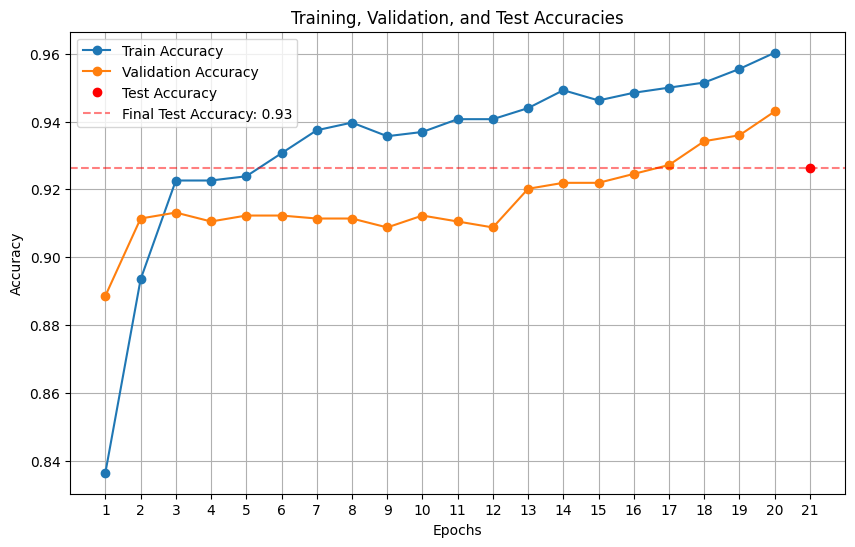

Accuracies for Training, Validation, and Testing:
    Epoch  Train Accuracy  Validation Accuracy  Test Accuracy
0       1        0.836432             0.888596            NaN
1       2        0.893467             0.911404            NaN
2       3        0.922613             0.913158            NaN
3       4        0.922613             0.910526            NaN
4       5        0.923869             0.912281            NaN
5       6        0.930653             0.912281            NaN
6       7        0.937437             0.911404            NaN
7       8        0.939698             0.911404            NaN
8       9        0.935678             0.908772            NaN
9      10        0.936935             0.912281            NaN
10     11        0.940704             0.910526            NaN
11     12        0.940704             0.908772            NaN
12     13        0.943970             0.920175            NaN
13     14        0.949246             0.921930            NaN
14     15        0.9

Epoch  Train Accuracy  Validation Accuracy  Test Accuracy
0       1        0.836432             0.888596            NaN
1       2        0.893467             0.911404            NaN
2       3        0.922613             0.913158            NaN
3       4        0.922613             0.910526            NaN
4       5        0.923869             0.912281            NaN
5       6        0.930653             0.912281            NaN
6       7        0.937437             0.911404            NaN
7       8        0.939698             0.911404            NaN
8       9        0.935678             0.908772            NaN
9      10        0.936935             0.912281            NaN
10     11        0.940704             0.910526            NaN
11     12        0.940704             0.908772            NaN
12     13        0.943970             0.920175            NaN
13     14        0.949246             0.921930            NaN
14     15        0.946231             0.921930            NaN
15     16        0.948492             0.924561            NaN
16     17        0.950000             0.927193            NaN
17     18        0.951508             0.934211            NaN
18     19        0.955528             0.935965            NaN
19     20        0.960302             0.942982            NaN
20  Final             NaN                  NaN       0.926316

In [ ]:
#Task 2
##Task requirement: Split the data into training, validation, and test sets (T, V, S) with T = 70%, V = 20%, S = 10% and by building a model that GA updates its parameters
#Task overview: This task splits the dataset into three sets: 70% for training, 20% for validation, and 10% for testing and using this dataset we have a NN model with GA to update its paramaters

#Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## Setting the Dataset:-
# Split the dataset into features and target
X = bc_data.drop('diagnosis', axis=1).values
y = bc_data['diagnosis'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into T (train) 70% , V (validation) 20%, S (test) 10%
T, V, S = np.split(X, [int(.7 * len(X)), int(.9 * len(X))])
y_train, y_val, y_test = np.split(y, [int(.7 * len(y)), int(.9 * len(y))])
print(T.shape , y_train.shape)
print(V.shape , y_val.shape)
print(S.shape , y_test.shape)

#labeled data
labeled_train = np.column_stack((T, y_train))
labeled_val = np.column_stack((V, y_val))
labeled_test = np.column_stack((S, y_test))

# Create a Neural Network class:-
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Use a wider range for initial weights and biases
        self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_size, self.hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_size, self.output_size))
        self.bias_hidden = np.random.uniform(-1, 1, self.hidden_size)
        self.bias_output = np.random.uniform(-1, 1, self.output_size)

    def forward(self, X):
        # Forward pass
        self.hidden_layer = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output_layer = self.sigmoid(np.dot(self.hidden_layer, self.weights_hidden_output) + self.bias_output)
        return self.output_layer

    # sigmoid function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fitness(self, X, y):
        predictions = self.forward(X)
        predictions = np.round(predictions)  # Convert probabilities to 0 or 1
        accuracy = np.mean(predictions.flatten() == y)
        return accuracy

    def test_Expensive(self, labeled_input_matrix, weights_matrix):
        inputs = labeled_input_matrix[:, :-1]      # All columns except the last (features)
        target_labels = labeled_input_matrix[:, -1] # Last column (target label)
        # Forward pass using the provided weights
        hidden_layer = self.sigmoid(np.dot(inputs, weights_matrix[0]) + weights_matrix[1])  # Weights for input to hidden
        output_layer = self.sigmoid(np.dot(hidden_layer, weights_matrix[2]) + weights_matrix[3])  # Weights for hidden to output

        # Calculate error using the error function
        error_vector, aggregated_error = error_Expensive(output_layer, target_labels)  # Assuming labeled_input_matrix is the target output

        return error_vector, aggregated_error


def error_Expensive(actual_outputs_vector, target_output_vector):
    # Calculate the error vector
    error_vector = actual_outputs_vector - target_output_vector

    # Calculate aggregated error (Mean Absolute Error)
    aggregated_error = np.mean(np.abs(error_vector))

    return error_vector, aggregated_error


# Genetic Algorithm Functions
def mutate(weights, mutation_rate=0.1):
    for i in range(len(weights)):
        if np.random.rand() < mutation_rate:
            weights[i] += np.random.normal(0, 0.1)  # Small mutation
    return weights

def crossover(parent1, parent2):
    child = np.copy(parent1)
    for i in range(len(child)):
        if np.random.rand() < 0.5:
            child[i] = parent2[i]
    return child

# Initialize population of neural networks
population_size = 30
population = [NeuralNetwork(X.shape[1], 10, 1) for _ in range(population_size)]
fitness_scores = []

# Lists to store accuracies for visualization
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 20
batch_size = 100
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    # Create batches
    for start in range(0, len(T), batch_size):
        end = start + batch_size
        X_batch = T[start:end]
        y_batch = y_train[start:end]

        # Evaluate each network's fitness
        fitness_scores = np.array([nn.fitness(X_batch, y_batch) for nn in population])


        # Select the best networks
        sorted_indices = np.argsort(fitness_scores)[-5:]  # Select top 5
        best_networks = [population[i] for i in sorted_indices]

        # Create new population
        children = []
        while len(children) < 5:
            parent1, parent2 = np.random.choice(best_networks, 2, replace=False)
            child = NeuralNetwork(X.shape[1], 10, 1)
            child.weights_input_hidden = crossover(parent1.weights_input_hidden.flatten(), parent2.weights_input_hidden.flatten()).reshape(X.shape[1], 10)
            child.weights_hidden_output = crossover(parent1.weights_hidden_output.flatten(), parent2.weights_hidden_output.flatten()).reshape(10, 1)
            child.bias_hidden = crossover(parent1.bias_hidden, parent2.bias_hidden)
            child.bias_output = crossover(parent1.bias_output, parent2.bias_output)
            child.weights_input_hidden = mutate(child.weights_input_hidden)
            child.weights_hidden_output = mutate(child.weights_hidden_output)
            child.bias_hidden = mutate(child.bias_hidden)
            child.bias_output = mutate(child.bias_output)
            children.append(child)

        # Combine the best networks and the children to form new population
        population = best_networks + children



    # Train accuracy
    train_fitness_scores = np.array([nn.fitness(T, y_train) for nn in population])
    train_accuracy = np.mean(train_fitness_scores)
    train_accuracies.append(train_accuracy)
    print(f'Train Accuracy: {train_accuracy}')

    # Training error calculation
    for nn in population:
        weights_matrix = [nn.weights_input_hidden, nn.bias_hidden, nn.weights_hidden_output, nn.bias_output]
        error_vector, aggregated_error = nn.test_Expensive(labeled_train, weights_matrix)
        print(f'Training Error: {aggregated_error}')

    # Validation accuracy
    val_fitness_scores = np.array([nn.fitness(V, y_val) for nn in population])
    val_accuracy = np.mean(val_fitness_scores)
    val_accuracies.append(val_accuracy)
    print(f'Validation Accuracy: {val_accuracy}')

    # Validation test
    for nn in population:
        weights_matrix = [nn.weights_input_hidden, nn.bias_hidden, nn.weights_hidden_output, nn.bias_output]
        error_vector, aggregated_error = nn.test_Expensive(labeled_val, weights_matrix)
        print(f'Validation Error: {aggregated_error}')



# Testing test_error
for nn in population:
    weights_matrix = [nn.weights_input_hidden, nn.bias_hidden, nn.weights_hidden_output, nn.bias_output]
    error_vector, aggregated_error = nn.test_Expensive(labeled_test, weights_matrix)
    print(f'Test Error: {aggregated_error}')

# Testing the final population
test_fitness_scores = np.array([nn.fitness(S, y_test) for nn in population])
final_test_accuracy = np.mean(test_fitness_scores)
print(f'Test Accuracy: {final_test_accuracy}')

# Visualization of training, validation, and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(num_epochs + 1, final_test_accuracy, 'ro', label='Test Accuracy')  # 'ro' for a red marker
plt.axhline(y=final_test_accuracy, color='r', linestyle='--', alpha=0.5, label=f'Final Test Accuracy: {final_test_accuracy:.2f}')
plt.title('Training, Validation, and Test Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, num_epochs + 2))
plt.legend()
plt.grid()
plt.show()




"""
-Data Preprocessing: The dataset is split into three sets (70% training, 20% validation, and 10% testing) and standardized for consistency.

- Neural Network and Genetic Algorithm Setup: The NeuralNetwork class defines a feedforward network with randomly initialized weights and biases.
The GA includes mutation (small random changes in weights) and crossover (combining two parent networks) to evolve the network parameters.

- Training Process: A population of neural networks is initialized. In each epoch, the population is evaluated on training batches.
The top 5 networks are selected based on fitness (accuracy), and a new generation is created through crossover and mutation of the top networks.

-Evaluation: After each epoch, average training and validation accuracies are calculated. At the end, the final population's accuracy on the test set is measured.

-Visualization: Training and validation accuracies are plotted over epochs to visualize model performance over time.

"""



# Prepare data for the table
accuracy_data = {
    'Epoch': list(range(1, num_epochs + 1)) + ['Final'],
    'Train Accuracy': train_accuracies + [None],  # Append None for the final row
    'Validation Accuracy': val_accuracies + [None],  # Append None for the final row
    'Test Accuracy': [None] * num_epochs + [final_test_accuracy]  # Test accuracy only in the final row
}
# Create a DataFrame
accuracy_df = pd.DataFrame(accuracy_data)
# Display the table
print("Accuracies for Training, Validation, and Testing:")
print(accuracy_df)

# Create a DataFrame
accuracy_df = pd.DataFrame(accuracy_data)
from IPython.display import display
display(accuracy_df)

# Task 3

(398, 25) (398,)
(114, 25) (114,)
(57, 25) (57,)
Original Weights Matrix:
[array([[-0.32942821,  0.90259833, -0.51826702,  0.15116905,  0.15384251,
        -0.44119876, -0.54760221, -0.25616244, -0.03961822,  0.22455481],
       [-0.1408446 , -0.31550451,  0.29554917, -0.36227353,  0.65208281,
         0.75060963,  0.86030735, -0.60622446,  0.04236761, -0.17859778],
       [-0.92862365, -0.57604648,  0.23453203, -0.99933294, -0.03663226,
        -0.22009863, -0.77057685, -0.10332826, -0.89916387,  0.62183494],
       [ 0.94839695, -0.42533045, -0.66087605,  0.29985686,  0.56728193,
        -0.29364812,  0.2734371 ,  0.4545187 ,  0.72529252,  0.32793341],
       [-0.18624643,  0.15993466,  0.61090934, -0.86299153,  0.26368608,
        -0.39003097,  0.16911159, -0.95517085,  0.82004307, -0.4653646 ],
       [-0.59747066, -0.56232667, -0.97677305, -0.6398191 , -0.4117462 ,
        -0.98573833, -0.6556399 , -0.27670766,  0.09930464,  0.36633389],
       [ 0.94785382,  0.67085678,  0.769320

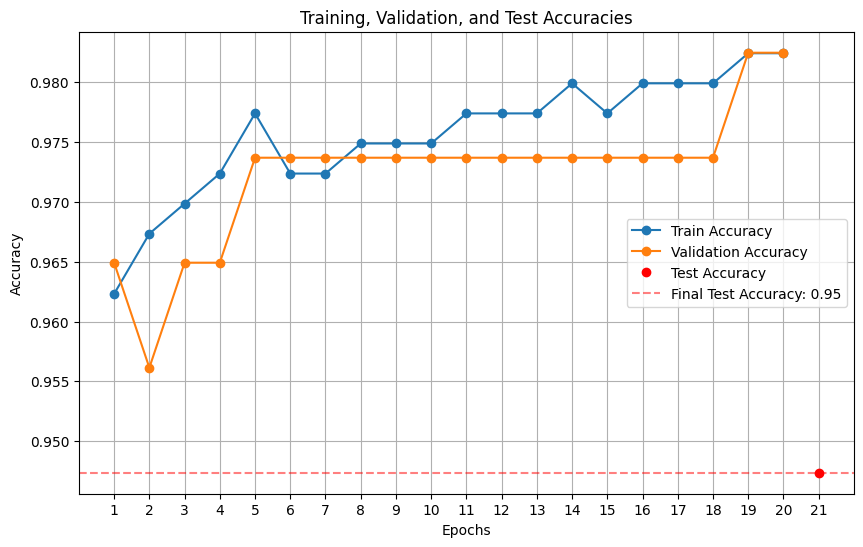

Accuracies for Training, Validation, and Testing:
    Epoch  Train Accuracy  Validation Accuracy  Test Accuracy
0       1        0.962312             0.964912            NaN
1       2        0.967337             0.956140            NaN
2       3        0.969849             0.964912            NaN
3       4        0.972362             0.964912            NaN
4       5        0.977387             0.973684            NaN
5       6        0.972362             0.973684            NaN
6       7        0.972362             0.973684            NaN
7       8        0.974874             0.973684            NaN
8       9        0.974874             0.973684            NaN
9      10        0.974874             0.973684            NaN
10     11        0.977387             0.973684            NaN
11     12        0.977387             0.973684            NaN
12     13        0.977387             0.973684            NaN
13     14        0.979899             0.973684            NaN
14     15        0.9

In [ ]:
#Task 3
#Task requirement: Split the data into training, validation, and test sets (T, V, S) with T = 70%, V = 20%, S = 10% and by building a model using Backpropagation updates its parameters
#Task overview: This task splits the dataset into three sets: 70% for training, 20% for validation, and 10% for testing and using this dataset we have a NN model with Backpropagation to update its paramaters

#Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## Setting the Dataset:-
# Split the dataset into features and target
X = bc_data.drop('diagnosis', axis=1).values
y = bc_data['diagnosis'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into T (train) 70% , V (validation) 20%, S (test) 10%
T, V, S = np.split(X, [int(.7 * len(X)), int(.9 * len(X))])
y_train, y_val, y_test = np.split(y, [int(.7 * len(y)), int(.9 * len(y))])
print(T.shape , y_train.shape)
print(V.shape , y_val.shape)
print(S.shape , y_test.shape)

#labeled data
labeled_train = np.column_stack((T, y_train))
labeled_val = np.column_stack((V, y_val))
labeled_test = np.column_stack((S, y_test))

# Create a Neural Network class for Backpropagation:-
class NeuralNetworkBP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Use a wider range for initial weights and biases
        self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_size, self.hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_size, self.output_size))
        self.bias_hidden = np.random.uniform(-1, 1, self.hidden_size)
        self.bias_output = np.random.uniform(-1, 1, self.output_size)

    def forward(self, X):
        # Forward pass
        self.hidden_layer = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output_layer = self.sigmoid(np.dot(self.hidden_layer, self.weights_hidden_output) + self.bias_output)
        return self.output_layer

    # Sigmoid activation function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Sigmoid derivative for backpropagation
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Compute error (Mean Squared Error)
    def compute_error(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def backward(self, X, y, learning_rate):
          # Performing the forward pass
          self.forward(X)

          # Reshape y to match output layer shape (batch_size, 1)
          y = y.reshape(-1, 1)  # Ensure y is a column vector

          # Calculate the output layer error and its gradient
          output_error = self.output_layer - y
          output_delta = output_error * self.sigmoid_derivative(self.output_layer)

          # Calculate the hidden layer error and its gradient
          hidden_error = output_delta.dot(self.weights_hidden_output.T)
          hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer)

          # Update weights and biases using gradient descent
          self.weights_hidden_output -= self.hidden_layer.T.dot(output_delta) * learning_rate
          self.weights_input_hidden -= X.T.dot(hidden_delta) * learning_rate





    # Evaluate the model's accuracy
    def accuracy(self, X, y):
        predictions = self.forward(X)
        predictions = np.round(predictions)  # Convert probabilities to 0 or 1
        accuracy = np.mean(predictions.flatten() == y)
        return accuracy


    def test_Expensive(self, labeled_input_matrix, weights_matrix):
        inputs = labeled_input_matrix[:, :-1]      # All columns except the last (features)
        target_labels = labeled_input_matrix[:, -1] # Last column (target label)
        # Forward pass using the provided weights
        hidden_layer = self.sigmoid(np.dot(inputs, weights_matrix[0]) + weights_matrix[1])  # Weights for input to hidden
        output_layer = self.sigmoid(np.dot(hidden_layer, weights_matrix[2]) + weights_matrix[3])  # Weights for hidden to output

        # Calculate error using the error function
        error_vector, aggregated_error = error_Expensive(output_layer, target_labels)  # Assuming labeled_input_matrix is the target output

        return error_vector, aggregated_error


def error_Expensive(actual_outputs_vector, target_output_vector):
    # Calculate the error vector
    error_vector = actual_outputs_vector - target_output_vector

    # Calculate aggregated error (Mean Absolute Error)
    aggregated_error = np.mean(np.abs(error_vector))

    return error_vector, aggregated_error



# Train function to update weights
def train_Expensive(Labeled_Input_Matrix, Weights_Matrix, BatchSize):
    # Initialize the neural network
    input_size = Labeled_Input_Matrix.shape[1] - 1  # Exclude label column
    hidden_size = 10  # Number of neurons in the hidden layer
    output_size = 1  # Binary classification (output is 0 or 1)

    nn = NeuralNetworkBP(input_size, hidden_size, output_size)
    nn.weights_input_hidden, nn.weights_hidden_output, nn.bias_hidden, nn.bias_output = Weights_Matrix

    # Shuffle the data
    np.random.shuffle(Labeled_Input_Matrix)
    X_train = Labeled_Input_Matrix[:, :-1]  # Features (excluding target column)
    y_train = Labeled_Input_Matrix[:, -1]   # Labels (target column)

    # Mini-batch training
    for start in range(0, len(Labeled_Input_Matrix), BatchSize):
        end = start + BatchSize
        X_batch = X_train[start:end]
        y_batch = y_train[start:end]

        # Perform backpropagation and weight updates
        nn.backward(X_batch, y_batch, learning_rate=0.1)

    # Return the updated weights
    updated_weights_matrix = [
        nn.weights_input_hidden,
        nn.weights_hidden_output,
        nn.bias_hidden,
        nn.bias_output
    ]
    return updated_weights_matrix


# Initialize the neural network
input_size = X.shape[1]
hidden_size = 10
output_size = 1  # Binary classification (output is 0 or 1)
nn = NeuralNetworkBP(input_size, hidden_size, output_size)


original_weights_matrix = [
    nn.weights_input_hidden.copy(),
    nn.weights_hidden_output.copy(),
    nn.bias_hidden.copy(),
    nn.bias_output.copy()
]
weights_matrix = [nn.weights_input_hidden, nn.weights_hidden_output, nn.bias_hidden, nn.bias_output]

# Train the network for one epoch
updated_weights = train_Expensive(labeled_train, weights_matrix, BatchSize=100)

print("Original Weights Matrix:")
print(original_weights_matrix)
print("Updated Weights Matrix:")
print(updated_weights)
print("------------------------------------------------------------------")
print("------------------------------------------------------------------")
print("------------------------------------------------------------------")



# Set hyperparameters
learning_rate = 0.1
num_epochs = 20
batch_size = 100

# Lists to store accuracies for visualization
train_accuracies = []
val_accuracies = []


# Training loop with backpropagation
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')

    # Shuffle training data for batch processing
    permutation = np.random.permutation(len(T))
    X_shuffled, y_shuffled = T[permutation], y_train[permutation]

    # Mini-batch training
    for start in range(0, len(T), batch_size):
        end = start + batch_size
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        # Perform backpropagation and weight updates
        nn.backward(X_batch, y_batch, learning_rate)

    # Compute and store training accuracy
    train_accuracy = nn.accuracy(T, y_train)
    train_accuracies.append(train_accuracy)

    # Compute and store validation accuracy
    val_accuracy = nn.accuracy(V, y_val)
    val_accuracies.append(val_accuracy)

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

    # Forward pass for training data to get predictions
    train_predictions = nn.forward(T)
    # Use error_[Teamname] function to calculate error for training data
    error_vector, aggregated_error = error_Expensive(train_predictions, y_train)
    # print(f'Training Error Vector: {error_vector}')
    print(f'Training Aggregated Error: {aggregated_error:.4f}')

    # Print validation error
    error_vector, aggregated_error = nn.test_Expensive(labeled_val, [nn.weights_input_hidden, nn.bias_hidden, nn.weights_hidden_output, nn.bias_output])
    # print(f'Validation Error Vector: {error_vector}')
    print(f'Validation Aggregated Error: {aggregated_error:.4f}')





# Testing the model on the test set
test_accuracy = nn.accuracy(S, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
# Print test error
test_error_vector, test_aggregated_error = nn.test_Expensive(labeled_test, [nn.weights_input_hidden, nn.bias_hidden, nn.weights_hidden_output, nn.bias_output])
# print(f'Test Error Vector: {test_error_vector}')
print(f'Test Aggregated Error: {test_aggregated_error:.4f}')

# Visualization of training, validation, and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(num_epochs + 1, test_accuracy, 'ro', label='Test Accuracy')  # 'ro' for a red marker
plt.axhline(y=test_accuracy, color='r', linestyle='--', alpha=0.5, label=f'Final Test Accuracy: {test_accuracy:.2f}')
plt.title('Training, Validation, and Test Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, num_epochs + 2))
plt.legend()
plt.grid()
plt.show()



"""
-Data Preprocessing: The dataset is split into three sets (70% training, 20% validation, and 10% testing) and standardized for consistency.

- Neural Network and Backpropagation Setup: The NeuralNetwork class defines a feedforward network with randomly initialized weights and biases.
The BP includes gradient descent (using backpropagation) to update the weights and biases to minimize the loss function during training.

- Training Process: A neural network is trained using backpropagation. In each epoch, the network is evaluated on training batches.
The weights are updated based on the gradient of the error with respect to the weights, using backpropagation.

-Evaluation: After each epoch, average training and validation accuracies are calculated. At the end, the final network's accuracy on the test set is measured.

-Visualization: Training and validation accuracies are plotted over epochs to visualize model performance over time.
"""


# Prepare data for the table
accuracy_data = {
    'Epoch': list(range(1, num_epochs + 1)) + ['Final'],
    'Train Accuracy': train_accuracies + [None],  # Append None for the final row
    'Validation Accuracy': val_accuracies + [None],  # Append None for the final row
    'Test Accuracy': [None] * num_epochs + [test_accuracy]  # Test accuracy only in the final row
}

# Create a DataFrame
accuracy_df = pd.DataFrame(accuracy_data)
# Display the table
print("Accuracies for Training, Validation, and Testing:")
print(accuracy_df)
